<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bcbcbc;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:center"> Bone Marrow Changes in Lumbar Vertebrae MRI Classification</p>
</div>


<p style="text-align:center;"><img src="https://www.ajronline.org/cms/10.2214/AJR.11.7005/asset/images/12_11_7005_01.jpeg" width="200" height="350">
    
    
    
    
    
The objective of this project is to build a deep-learning model that can accurately classify MRI images as either Normal or Abnormal. The model will be trained on a dataset of labeled MRI images and will learn to identify specific patterns and features associated with Bone Marrow Changes in Lumbar Vertebrae. For Bone Marrow Changes in Lumbar Vertebrae classification, Bone Marrow Changes in Lumbar Vertebrae were divided into two main groups: Normal, and Abnormal, depending on the area that is involved. Each of these classes is subsequently divided into sub-groups. To introduce a transfer learning model that can improve the classification of Bone Marrow Changes in Lumbar Vertebrae.

In [1]:
# Import packages
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Define the general path
path = '/input/bonewithout-augment-70-20-10/boneWithOut_Augment/'

In [4]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 712 images belonging to 2 classes.


In [5]:
valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)



Found 203 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 103 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

# Input shape for images
input_shape = (224, 224, 3)

# Load MobileNetV2 with ImageNet weights, excluding the top (fully connected) layers
mobilenetv2_model = MobileNetV2(weights='imagenet', 
                                include_top=False, 
                                input_shape=input_shape
)

9406464/9406464 [==============================] - 1s 0us/step


In [8]:
# Freezing Layers
for layer in mobilenetv2_model.layers[:-1]:
    layer.trainable=False

In [9]:
model_mobilenetv2 = tf.keras.Sequential()
model_mobilenetv2.add(mobilenetv2_model)
model_mobilenetv2.add(Flatten())
model_mobilenetv2.add(Dense(2,activation = 'softmax'))

In [10]:
model_mobilenetv2.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [11]:
model_mobilenetv2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 2383426 (9.09 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


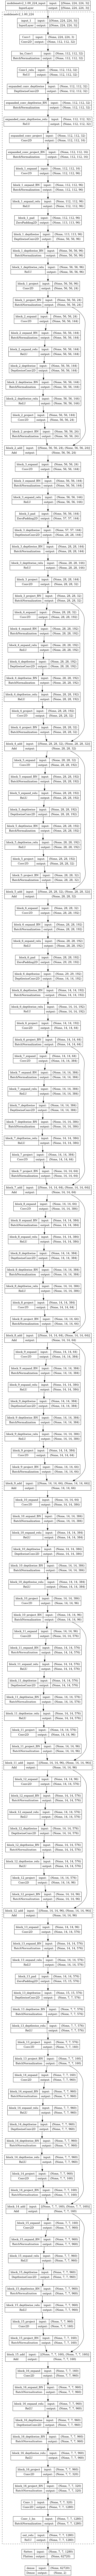

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model_mobilenetv2,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

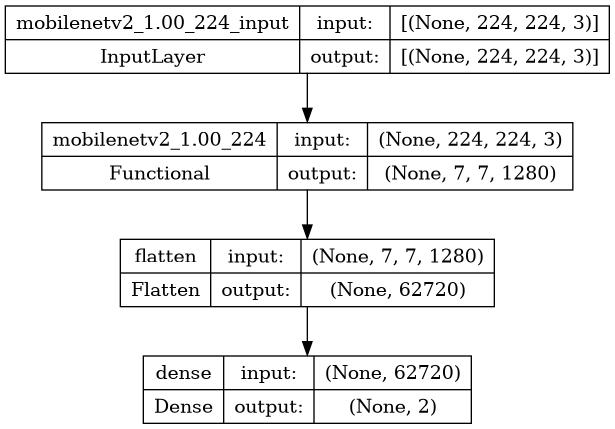

In [13]:
plot_model(model_mobilenetv2,show_shapes=True, show_layer_names=True, rankdir='TB')

In [14]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size


In [15]:
# Stop the training when there is no improvement after 10 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [16]:
# Train the model
history =model_mobilenetv2.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
22/22 [==============================] - 20s 784ms/step - loss: 2.7358 - accuracy: 0.6544 - val_loss: 1.2898 - val_accuracy: 0.7396
Epoch 2/20
22/22 [==============================] - 13s 621ms/step - loss: 0.5719 - accuracy: 0.8750 - val_loss: 0.8131 - val_accuracy: 0.8177
Epoch 3/20
22/22 [==============================] - 14s 650ms/step - loss: 0.1148 - accuracy: 0.9645 - val_loss: 0.7880 - val_accuracy: 0.8021
Epoch 4/20
22/22 [==============================] - 16s 722ms/step - loss: 0.0556 - accuracy: 0.9838 - val_loss: 0.9132 - val_accuracy: 0.8073
Epoch 5/20
22/22 [==============================] - 14s 627ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.9846 - val_accuracy: 0.7917
Epoch 6/20
22/22 [==============================] - 14s 633ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8223 - val_accuracy: 0.8385
Epoch 7/20
22/22 [==============================] - 15s 666ms/step - loss: 8.2892e-04 - accuracy: 1.0000 - val_loss: 0.8317 - val_accuracy: 0.

In [17]:
# Evaluate the model
model_mobilenetv2.evaluate(valid_generator,steps=STEP_SIZE_VALID)

6/6 [==============================] - 3s 459ms/step - loss: 0.8456 - accuracy: 0.8438


[0.8456451296806335, 0.84375]

In [18]:
# Save the model
model_mobilenetv2.save("model_XCEPTION")

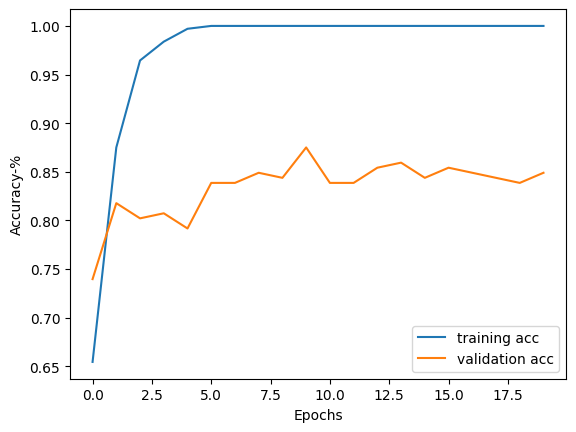

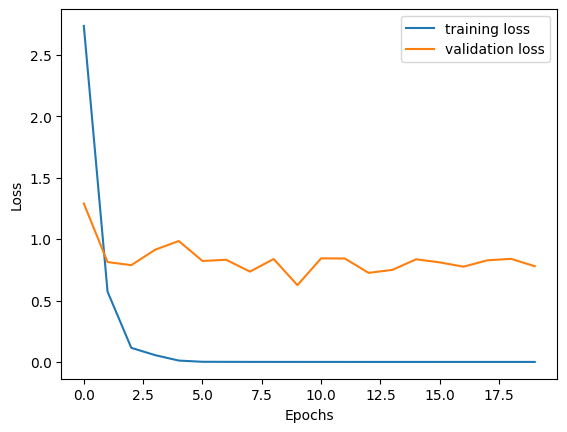

In [19]:
# plot learning curve
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [20]:
#info about optimizers
model_mobilenetv2.optimizer.get_config() 

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model_mobilenetv2.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


103/103 [==============================] - 4s 27ms/step


In [22]:
predictions[0:5]

['Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal']

In [23]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/103
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 83.5%.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

              precision    recall  f1-score   support

    Abnormal       0.87      0.82      0.84        56
      Normal       0.80      0.85      0.82        47

    accuracy                           0.83       103
   macro avg       0.83      0.84      0.83       103
weighted avg       0.84      0.83      0.84       103



In [25]:
print(confusion_matrix(Actual, predictions))

[[46 10]
 [ 7 40]]


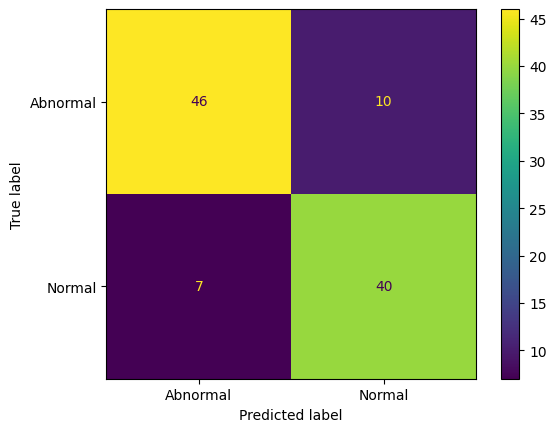

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Actual, predictions)

In [27]:
%who

Actual	 BatchNormalization	 ConfusionMatrixDisplay	 Conv2D	 Dense	 Dropout	 EarlyStopping	 Flatten	 ImageDataGenerator	 
Input	 MaxPool2D	 MobileNetV2	 STEP_SIZE_TEST	 STEP_SIZE_TRAIN	 STEP_SIZE_VALID	 Sequential	 acc	 actual	 
classification_report	 confusion_matrix	 count_accurate	 current_idx	 early_stop	 history	 i	 input_shape	 labels	 
layer	 mobilenetv2_model	 model_mobilenetv2	 np	 path	 plot_learning_curve	 plot_model	 plt	 pred	 
predicted_class_indices	 predictions	 preprocessing	 string	 substr	 test_datagen	 test_generator	 tf	 train_datagen	 
train_generator	 valid_datagen	 valid_generator	 


In [28]:
acc

0.8349514563106796

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Assuming 'Actual' and 'predictions' are arrays or lists
conf_matrix = confusion_matrix(Actual, predictions)
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
tn
# Calculate metrics
accuracy = accuracy_score(Actual, predictions)
precision = precision_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
recall = recall_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
specificity = tn / (tn + fp)
f1 = f1_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label

# Print the results
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Specificity: {round(specificity, 4)}")
print(f"F1-score: {round(f1, 4)}")
print(f"TN: {round(tn)}")
print(f"FP: {round(fp)}")
print(f"FN: {round(fn)}")
print(f"TP: {round(tp)}")

Accuracy: 0.835
Precision: 0.8679
Recall: 0.8214
Specificity: 0.8214
F1-score: 0.844
TN: 46
FP: 10
FN: 7
TP: 40
